# Project: Wrangling and Analyze Data

This project focuses on the main fundamental concepts of data analysis which leads to a real application on real-time data. and this data is concerned about "WeLoveDogs" Tweets from [Twitter](https://x.com/)

In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import tweepy

# Import Pillow for imgs
from PIL import Image
from io import BytesIO
import requests

%matplotlib inline

## Gathering

We start our data analysis process by gathering data from the assigned resources. by the project description. We have `3` datasets to gather.

In [209]:
# Read from CSV file into a pandas dataframe
df_twitter_archive = pd.read_csv('./data/twitter-archive-enhanced.csv')

# Test case
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [210]:
# Read from a TSV file into a pandas dataframe
df_image_predictions = pd.read_csv('./data/image-predictions.tsv', sep='\t')

# Test Case
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [211]:
# Read json data from .txt file into a dataframe
df_tweet_json = pd.read_json('./data/tweet-json.txt', lines=True)

# Test Case
df_tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing

I intend to perform this assessment using programmatic and visual approaches. but Let's start with a visual assessment using Spreadsheet software like **Excel**

In [212]:
# Assess 'df_twitter_archive'
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [213]:
# Get info on the df
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [214]:
# Get description
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [215]:
# Working with the 'df_twitter_archive'
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [216]:
# Working with dog names
df_twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune

In [217]:
# Working with 'text'
df_twitter_archive['text'].head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

In [218]:
# Text that doesn't start with 'This is'
df_twitter_archive[df_twitter_archive['text'].str.contains('This is ') == False]["name"].value_counts()

name
a          9
Winston    6
Jack       5
Jax        4
Maggie     4
          ..
Rufus      1
Clarkus    1
Venti      1
Katie      1
the        1
Name: count, Length: 265, dtype: int64

In [219]:
# Wrong names
df_twitter_archive[df_twitter_archive['name'].isin(['a', 'an', 'the', 'None', 'such', 'O'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,NaN,NaN,NaN,NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,pupper,NaN
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,NaN,NaN,NaN,NaN
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,NaN,NaN,NaN,NaN
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,NaN,NaN,NaN,NaN
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN


In [220]:
# Investigate the 'Rating' columns
df_twitter_archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [221]:
# Investigate the 'Rating' columns
df_twitter_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [222]:
# Does the numerator smaller than the denominator in some cases?
df_twitter_archive[df_twitter_archive['rating_numerator'] < df_twitter_archive['rating_denominator']]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,NaN,NaN,NaN
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,NaN,NaN,NaN,NaN
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,NaN,NaN,NaN,NaN
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [223]:
# Check non_dog tweets
df_twitter_archive[df_twitter_archive['text'].str.contains('(https://t.co)')]

<ipython-input-223-202801b4dc34>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_twitter_archive[df_twitter_archive['text'].str.contains('(https://t.co)')]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [224]:
# Investigate the 'source' column
df_twitter_archive['source'].head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [225]:
# Extract the device type from the source
df_twitter_archive['source'].str.extract('^<a.+>(.+)</a>$')[0].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [226]:
# Looking at the dog stages columns
print(df_twitter_archive['doggo'].unique())
print(df_twitter_archive['pupper'].unique())
print(df_twitter_archive['puppo'].unique())
print(df_twitter_archive['floofer'].unique())

[nan 'doggo']
[nan 'pupper']
[nan 'puppo']
[nan 'floofer']


In [227]:
# Return the row if it has less than three null values in [doggo, pupper, puppo, floofer]
df_twitter_archive[df_twitter_archive[['doggo', 'pupper', 'puppo', 'floofer']].isnull().sum(axis=1) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,NaN,NaN,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,NaN,NaN
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,NaN,pupper,NaN
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,NaN,pupper,NaN
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,NaN,pupper,NaN
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,NaN,pupper,NaN
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,NaN,pupper,NaN
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,NaN,pupper,NaN
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggo,NaN,pupper,NaN
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,NaN,pupper,NaN


In [228]:
# Working with 'expanded_urls'
df_twitter_archive['expanded_urls'].head()

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
Name: expanded_urls, dtype: object

In [229]:
# Checking urls that doesn't start with 'https://twitter.com/dog_rates/status/'
df_twitter_archive[df_twitter_archive['expanded_urls'].str.contains('https://twitter.com/dog_rates/status') == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,NaN,NaN,NaN,NaN,NaN
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,NaN,NaN,NaN,NaN,NaN
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,NaN,NaN,NaN,NaN,NaN
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,NaN,NaN,NaN,pupper,NaN
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,676121918416756736,NaN,NaN,2015-12-13 19:30:01 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a very excited dog. Cle...,NaN,NaN,NaN,https://vine.co/v/iZXg7VpeDAv,8,10,NaN,NaN,NaN,NaN,NaN
1916,674307341513269249,NaN,NaN,2015-12-08 19:19:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is life-changing. 12/10 https://t.co/SroT...,NaN,NaN,NaN,https://vine.co/v/i7nWzrenw5h,12,10,life,NaN,NaN,NaN,NaN
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,NaN,NaN,NaN,NaN
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,NaN,NaN,NaN,NaN,NaN


In [230]:
# Assess 'df_image_predictions'
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [231]:
# Check image p* columns in one line
df_image_predictions[[
    'p1', 'p1_conf', 'p1_dog',
    'p2', 'p2_conf', 'p2_dog',
    'p3', 'p3_conf', 'p3_dog',
    'img_num', 'jpg_url'
]][df_image_predictions["p1_dog"] == True].sample(20)

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,img_num,jpg_url
110,Pomeranian,0.800432,True,Pekinese,0.168445,True,Chihuahua,0.008950,True,1,https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg
1362,standard_poodle,0.660893,True,Samoyed,0.314886,True,miniature_poodle,0.008834,True,1,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg
1189,Blenheim_spaniel,0.933755,True,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True,3,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg
2058,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True,1,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg
153,beagle,0.319110,True,Italian_greyhound,0.103338,True,basenji,0.091930,True,1,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg
447,malamute,0.180079,True,Eskimo_dog,0.178033,True,Siberian_husky,0.077966,True,1,https://pbs.twimg.com/media/CVzpUGUWUAAo7Vn.jpg
562,Eskimo_dog,0.199347,True,dalmatian,0.153225,True,American_Staffordshire_terrier,0.107798,True,1,https://pbs.twimg.com/media/CWhzTbzWUAAEAUN.jpg
1169,golden_retriever,0.553901,True,Labrador_retriever,0.119475,True,bluetick,0.077475,True,2,https://pbs.twimg.com/media/CjbV-lEWgAAr6WY.jpg
967,Pembroke,0.698165,True,Chihuahua,0.105834,True,bloodhound,0.062030,True,1,https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg
362,Pembroke,0.582560,True,Cardigan,0.258869,True,nipple,0.033835,False,1,https://pbs.twimg.com/media/CVZjOktVAAAtigw.jpg


In [232]:
# Does the 'p2', 'p3' depend on 'p1' column
df_image_predictions[(df_image_predictions['p1'] > df_image_predictions['p2']) & (df_image_predictions['p1'] > df_image_predictions['p3'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [233]:
# Check if "p*_dog" is equal true
df_image_predictions[df_image_predictions['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [234]:
# Check Image prediction columns
df_image_predictions[["p1", "p2", "p3"]].sample(15)

,p1,p2,p3
1988,pug,French_bulldog,bull_mastiff
1166,pug,goose,fur_coat
1035,Lakeland_terrier,miniature_poodle,standard_poodle
524,whippet,Great_Dane,boxer
1632,Siberian_husky,American_Staffordshire_terrier,Eskimo_dog
1577,Cardigan,Pembroke,papillon
1284,American_black_bear,lesser_panda,titi
908,bath_towel,Norwegian_elkhound,Great_Dane
163,shower_curtain,Chesapeake_Bay_retriever,bathtub
1303,Pembroke,Cardigan,Shetland_sheepdog


In [235]:
# Assess 'df_tweet_json'
df_tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [236]:
# Information about 'df_tweet_json'
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [237]:
# 'full_text' in df_tweet_json
df_tweet_json['full_text'].unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'],
      dtype=object)

In [238]:
# 'truncated' in df_tweet_json
df_tweet_json['truncated'].unique()

array([False])

In [239]:
# Working with 'display_text_range'
df_tweet_json['display_text_range']

0        [0, 85]
1       [0, 138]
2       [0, 121]
3        [0, 79]
4       [0, 138]
          ...   
2349    [0, 120]
2350    [0, 137]
2351    [0, 130]
2352    [0, 139]
2353    [0, 131]
Name: display_text_range, Length: 2354, dtype: object

In [240]:
# Working with 'entities'
df_tweet_json['entities']

0       {'hashtags': [], 'symbols': [], 'user_mentions...
1       {'hashtags': [], 'symbols': [], 'user_mentions...
2       {'hashtags': [], 'symbols': [], 'user_mentions...
3       {'hashtags': [], 'symbols': [], 'user_mentions...
4       {'hashtags': [{'text': 'BarkWeek', 'indices': ...
                              ...                        
2349    {'hashtags': [], 'symbols': [], 'user_mentions...
2350    {'hashtags': [], 'symbols': [], 'user_mentions...
2351    {'hashtags': [], 'symbols': [], 'user_mentions...
2352    {'hashtags': [], 'symbols': [], 'user_mentions...
2353    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, Length: 2354, dtype: object

In [241]:
df_tweet_json['entities'].sample(1)

1469    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, dtype: object

In [242]:
df_tweet_json[['retweeted_status', 'quoted_status']].sample(20)

,retweeted_status,quoted_status
2289,NaN,NaN
1727,NaN,NaN
2220,NaN,NaN
1281,NaN,NaN
512,NaN,NaN
252,NaN,NaN
982,NaN,NaN
1741,NaN,NaN
203,{'created_at': 'Tue Feb 14 23:43:18 +0000 2017...,NaN
640,NaN,NaN


In [243]:
# Language
df_tweet_json['lang'].unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [244]:
# df_tweet_json ['und']
df_tweet_json[df_tweet_json['lang'] == 'und']

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,8.860534e+17,NaN
289,2017-03-04 22:12:52+00:00,838150277551247360,838150277551247360,@markhoppus 182/10,False,"[12, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.381455e+17,...,1824,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN
408,2017-01-23 00:56:15+00:00,823333489516937216,823333489516937216,@HistoryInPics 13/10,False,"[15, 20]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.233264e+17,...,777,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN
619,2016-11-08 23:01:49+00:00,796125600683540480,796125600683540480,#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,False,"[0, 41]","{'hashtags': [{'text': 'ImWithThor', 'indices'...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5511,False,False,0.0,0.0,und,NaN,7.961237e+17,7.961237e+17,{'created_at': 'Tue Nov 08 22:54:11 +0000 2016...
1078,2016-06-04 00:32:32+00:00,738891149612572673,738891149612572672,@mount_alex3 13/10,False,"[13, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.384119e+17,...,115,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN
1521,2016-01-22 18:49:36+00:00,690607260360429569,690607260360429568,12/10 @LightningHoltt,False,"[0, 21]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.903413e+17,...,313,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN
1912,2015-12-08 20:53:11+00:00,674330906434379776,674330906434379776,13/10\n@ABC7,False,"[0, 11]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.658147e+17,...,602,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN


In [245]:
# languages
df_tweet_json['lang'].value_counts()

lang
en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: count, dtype: int64

In [246]:
# possibly columns
df_tweet_json['possibly_sensitive'].value_counts()

possibly_sensitive
0.0    2211
Name: count, dtype: int64

In [247]:
df_tweet_json['possibly_sensitive_appealable'].value_counts()

possibly_sensitive_appealable
0.0    2211
Name: count, dtype: int64

In [248]:
# Retweeted count
df_tweet_json['retweet_count'].value_counts()

retweet_count
1972    5
3652    5
83      5
1207    4
336     4
       ..
3357    1
3018    1
2181    1
848     1
147     1
Name: count, Length: 1724, dtype: int64

In [249]:
# Favourited count
df_tweet_json['favorite_count'].value_counts()

favorite_count
0       179
2706      3
2918      3
610       3
2768      3
       ... 
7493      1
6671      1
4484      1
2872      1
2535      1
Name: count, Length: 2007, dtype: int64

In [250]:
# Favourited and Retweeted
df_tweet_json[['favorited', 'retweeted']].sample(20)

,favorited,retweeted
831,False,False
128,False,False
1655,False,False
901,False,False
1104,False,False
1232,False,False
1920,False,False
449,False,False
1344,False,False
793,False,False


In [251]:
# True value for Retweeted or favorited
df_tweet_json['retweeted'].value_counts()

retweeted
False    2354
Name: count, dtype: int64

In [252]:
df_tweet_json['favorited'].value_counts()

favorited
False    2346
True        8
Name: count, dtype: int64

### Assessment Report
Using Assessment methods, I've found many issues regarding the three datasets and and by using programmatic methods We found that:
<br>
<br>
**Quality Issues**
1. Missing Values in many values.
2. Inconsitent dog names.
3. Change Index Names
4. Inconsistent Rating Denominators/Numerators.
5. Non-Dog Tweets.
6. Inconsistent Stage Information.
7. Retweet and Reply Data Irrelevance.
8. Incorrect Data Type for `timestamp`.
9. False Dog Predictions.
10. Image predictions doesn't have inconsistent cases (uppercase and lowercase)
11. Dog Stage have multiple values
12. Unnecessary Columns
<br>
<br>
**Tidiness Issues**
1. Redundant Dog Stage Columns
2. Merging Datasets on `tweet_id`
3. Many Information in `text` columns

## Cleaning

### **Change Index Names**

I couldn't help but notice that the datasets need to be merged to ensure simplicity, but there is a strange thing that the index names are different in each dataset and that could resolve in a merging issue.
<br />
So, I need to change the index name in `df_tweet_json` into `tweet_id` to make merging easier. and make the index column as the `tweet_id`

In [253]:
# Rename the df_tweet_json
df_tweet_json.rename(columns={'id': 'tweet_id'}, inplace=True)

In [254]:
# Set the Index Column into `tweet_id` in each dataset
df_twitter_archive.set_index('tweet_id', inplace=True)
df_image_predictions.set_index('tweet_id', inplace=True)
df_tweet_json.set_index('tweet_id', inplace=True)

**Test**

In [255]:
# Check index for each dataset
df_twitter_archive.index

Index([892420643555336193, 892177421306343426, 891815181378084864,
       891689557279858688, 891327558926688256, 891087950875897856,
       890971913173991426, 890729181411237888, 890609185150312448,
       890240255349198849,
       ...
       666058600524156928, 666057090499244032, 666055525042405380,
       666051853826850816, 666050758794694657, 666049248165822465,
       666044226329800704, 666033412701032449, 666029285002620928,
       666020888022790149],
      dtype='int64', name='tweet_id', length=2356)

In [256]:
df_image_predictions.index

Index([666020888022790149, 666029285002620928, 666033412701032449,
       666044226329800704, 666049248165822465, 666050758794694657,
       666051853826850816, 666055525042405380, 666057090499244032,
       666058600524156928,
       ...
       890240255349198849, 890609185150312448, 890729181411237888,
       890971913173991426, 891087950875897856, 891327558926688256,
       891689557279858688, 891815181378084864, 892177421306343426,
       892420643555336193],
      dtype='int64', name='tweet_id', length=2075)

In [257]:
df_tweet_json.index

Index([892420643555336193, 892177421306343426, 891815181378084864,
       891689557279858688, 891327558926688256, 891087950875897856,
       890971913173991426, 890729181411237888, 890609185150312448,
       890240255349198849,
       ...
       666058600524156928, 666057090499244032, 666055525042405380,
       666051853826850816, 666050758794694657, 666049248165822465,
       666044226329800704, 666033412701032449, 666029285002620928,
       666020888022790149],
      dtype='int64', name='tweet_id', length=2354)

### **Merging datasets into one dataframe**

After I adjusted the `index` name in each dataset, I wanted to make the dataset into one dataset like to make data cleaning easier

In [258]:
# Merge dataframes together
df_merged = df_twitter_archive.merge(df_image_predictions, left_index=True, right_index=True)
df_merged = df_merged.merge(df_tweet_json, left_index=True, right_index=True)

**Test**

We can see from the test case below that the columns are a combination between the three datasets into one big dataframe with all of their columns data.

In [259]:
# Test case
df_merged.columns

Index(['in_reply_to_status_id_x', 'in_reply_to_user_id_x', 'timestamp',
       'source_x', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'id_str',
       'full_text', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'source_y', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quote

In [260]:
# Test case
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   in_reply_to_status_id_x        23 non-null     float64            
 1   in_reply_to_user_id_x          23 non-null     float64            
 2   timestamp                      2073 non-null   object             
 3   source_x                       2073 non-null   object             
 4   text                           2073 non-null   object             
 5   retweeted_status_id            79 non-null     float64            
 6   retweeted_status_user_id       79 non-null     float64            
 7   retweeted_status_timestamp     79 non-null     object             
 8   expanded_urls                  2073 non-null   object             
 9   rating_numerator               2073 non-null   int64              
 10

### **Drop unnecessary columns**
I read according to the project description the presence of some unnecessary columns because some of them isn't needed in the analysis later on, and others have the same other columns have.

In [261]:
# Take a copy of the new merged Dataframe
df_clean = df_merged.copy()

In [262]:
# Check columns
df_clean.columns

Index(['in_reply_to_status_id_x', 'in_reply_to_user_id_x', 'timestamp',
       'source_x', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'id_str',
       'full_text', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'source_y', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quote

In [263]:
# Drop duplicated columns that ends with _x and _y
df_clean = df_clean[df_clean.columns.drop(list(df_clean.filter(regex='_x$|_y$')))]

In [264]:
# Test case
df_clean.columns

Index(['timestamp', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'id_str',
       'full_text', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

In [265]:
# Remove unneeded columns
df_clean.drop([
    'retweeted_status_id',
    'retweeted_status_user_id',
    'retweeted_status_timestamp',
    'in_reply_to_status_id_str',
    'in_reply_to_user_id_str',
    'in_reply_to_screen_name',
    'retweeted_status',
    'quoted_status_id',
    'quoted_status_id_str',
    'quoted_status',
    'expanded_urls',
    'truncated',
    'full_text',
    'display_text_range',
    'entities',
    'extended_entities',
    'img_num',
    'lang',
    'possibly_sensitive',
    'possibly_sensitive_appealable',
    'retweeted',
    'favorited',
    'id_str',
    'user',
    'geo',
    'coordinates',
    'place',
    'contributors',
    'is_quote_status'
], axis=1, inplace=True)


**Test**

In [266]:
# Test case
df_clean.columns

Index(['timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'created_at', 'retweet_count', 'favorite_count'],
      dtype='object')

In [267]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2073 non-null   object             
 1   text                2073 non-null   object             
 2   rating_numerator    2073 non-null   int64              
 3   rating_denominator  2073 non-null   int64              
 4   name                1496 non-null   object             
 5   doggo               80 non-null     object             
 6   floofer             8 non-null      object             
 7   pupper              221 non-null    object             
 8   puppo               24 non-null     object             
 9   jpg_url             2073 non-null   object             
 10  p1                  2073 non-null   object             
 11  p1_conf             2073 non-null   float64            
 12  p1_dog  

### **Handling Missing Values**

I noticed many values that are missing inside each dataset and each one has columns that can be dropped and columns that We can remove its rows to handle them, We can also merge extra columns into one `new` column.

There's also a problem with columns that missing values or wrong values aren't just null values but also with wrong non-accurate values.

In [268]:
# Check missing values
df_clean.isnull().sum()

timestamp                0
text                     0
rating_numerator         0
rating_denominator       0
name                   577
doggo                 1993
floofer               2065
pupper                1852
puppo                 2049
jpg_url                  0
p1                       0
p1_conf                  0
p1_dog                   0
p2                       0
p2_conf                  0
p2_dog                   0
p3                       0
p3_conf                  0
p3_dog                   0
created_at               0
retweet_count            0
favorite_count           0
dtype: int64

In [269]:
# Replace null 'name' with 'Unknown'
df_clean['name'].fillna('Unknown', inplace=True)

**Test**

In [270]:
# Test case
df_clean['name'].isnull().sum()

0

In [271]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2073 non-null   object             
 1   text                2073 non-null   object             
 2   rating_numerator    2073 non-null   int64              
 3   rating_denominator  2073 non-null   int64              
 4   name                2073 non-null   object             
 5   doggo               80 non-null     object             
 6   floofer             8 non-null      object             
 7   pupper              221 non-null    object             
 8   puppo               24 non-null     object             
 9   jpg_url             2073 non-null   object             
 10  p1                  2073 non-null   object             
 11  p1_conf             2073 non-null   float64            
 12  p1_dog  

In [272]:
# Check for names less than 2 in length
df_clean[df_clean['name'].str.len() < 3]['name'].unique()

array(['a', 'Mo', 'Bo', 'an', 'O', 'Al', 'my', 'by', 'Ed', 'JD', 'Jo'],
      dtype=object)

In [273]:
df_clean[df_clean['name'].str.len() < 3]['name'].value_counts()

name
a     55
Bo     8
an     7
Mo     1
O      1
Al     1
my     1
by     1
Ed     1
JD     1
Jo     1
Name: count, dtype: int64

In [274]:
# Remove rows with 'a', 'O', 'my', 'by', 'such', 'None'
df_clean = df_clean[~df_clean['name'].isin(['a', 'O', 'my', 'by', 'such', 'None'])]

In [275]:
df_clean[df_clean['name'].str.len() < 3]['name'].value_counts()

name
Bo    8
an    7
Mo    1
Al    1
Ed    1
JD    1
Jo    1
Name: count, dtype: int64

In [276]:
df_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Unknown',
       'Jax', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart',
       'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles',
       'Jack', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
     

In [277]:
# Check names that doesn't start with uppercase
len(df_clean[df_clean['name'].str.islower()]['name'])

42

In [278]:
# Remove these names
df_clean = df_clean[~df_clean['name'].str.islower()]

**Test**

In [279]:
# Test case
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1972 entries, 892420643555336193 to 666020888022790149
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1972 non-null   object             
 1   text                1972 non-null   object             
 2   rating_numerator    1972 non-null   int64              
 3   rating_denominator  1972 non-null   int64              
 4   name                1972 non-null   object             
 5   doggo               76 non-null     object             
 6   floofer             8 non-null      object             
 7   pupper              210 non-null    object             
 8   puppo               24 non-null     object             
 9   jpg_url             1972 non-null   object             
 10  p1                  1972 non-null   object             
 11  p1_conf             1972 non-null   float64            
 12  p1_dog  

### **Inconsistent dog breeds casing (lowercase, uppercase)**

I noticed some columns in `p*` group to have inconsistent patterns in naming dogs, so, I had to do something about. I found the casing of the names to be fixing and turned into lowercase.

In [280]:
# Turn names of the dogs into lowercase
df_merged[['p1', 'p2', 'p3']]

,p1,p2,p3
tweet_id,,,
892420643555336193,orange,bagel,banana
892177421306343426,Chihuahua,Pekinese,papillon
891815181378084864,Chihuahua,malamute,kelpie
891689557279858688,paper_towel,Labrador_retriever,spatula
891327558926688256,basset,English_springer,German_short-haired_pointer
...,...,...,...
666049248165822465,miniature_pinscher,Rottweiler,Doberman
666044226329800704,Rhodesian_ridgeback,redbone,miniature_pinscher
666033412701032449,German_shepherd,malinois,bloodhound


In [281]:
# Change all names into lowercase
df_clean[['p1', 'p2', 'p3']] = df_merged[['p1', 'p2', 'p3']].applymap(lambda x: x.lower())

In [282]:
df_clean[['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
tweet_id,,,
882268110199369728,golden_retriever,labrador_retriever,cocker_spaniel
672902681409806336,ram,bighorn,arabian_camel
670676092097810432,dandie_dinmont,west_highland_white_terrier,clumber
673355879178194945,rottweiler,miniature_pinscher,appenzeller
878776093423087618,italian_greyhound,whippet,ibizan_hound
669214165781868544,minivan,police_van,minibus
821407182352777218,irish_setter,vizsla,chesapeake_bay_retriever
754482103782404096,tub,bathtub,shower_curtain
675111688094527488,labrador_retriever,brittany_spaniel,chesapeake_bay_retriever


In [283]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1972 entries, 892420643555336193 to 666020888022790149
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1972 non-null   object             
 1   text                1972 non-null   object             
 2   rating_numerator    1972 non-null   int64              
 3   rating_denominator  1972 non-null   int64              
 4   name                1972 non-null   object             
 5   doggo               76 non-null     object             
 6   floofer             8 non-null      object             
 7   pupper              210 non-null    object             
 8   puppo               24 non-null     object             
 9   jpg_url             1972 non-null   object             
 10  p1                  1972 non-null   object             
 11  p1_conf             1972 non-null   float64            
 12  p1_dog  

### **rating columns are spread over two columns and non-accurate**

I noticed that the rating is messed up in the dogs column. but we can't modify it because the rating in the twitter account has numerators bigger than denominators and denominators aren't the same to fix the rating base.

I also want to merge the columns and make a new rating column having the two ratings combined.

In [284]:
# Check Rating num. and den.
df_clean[['rating_numerator', 'rating_denominator']].sample(20)

,rating_numerator,rating_denominator
tweet_id,,
735274964362878976,11,10
744334592493166593,11,10
795464331001561088,13,10
678446151570427904,10,10
673612854080196609,7,10
847157206088847362,11,10
666786068205871104,2,10
672609152938721280,9,10
814638523311648768,12,10


In [285]:
df_clean['rating_denominator'].value_counts()

rating_denominator
10     1957
11        2
50        2
80        2
70        1
7         1
150       1
20        1
90        1
40        1
130       1
110       1
120       1
Name: count, dtype: int64

In [286]:
# Use the decimal rating as a value
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

**Test**

In [287]:
# Test case
df_clean[df_clean['rating_numerator'] > df_clean['rating_denominator']]['rating']

tweet_id
892420643555336193    1.3
892177421306343426    1.3
891815181378084864    1.2
891689557279858688    1.3
891327558926688256    1.2
                     ... 
666826780179869698    1.2
666421158376562688    1.2
666373753744588802    1.1
666273097616637952    1.1
666102155909144576    1.1
Name: rating, Length: 1186, dtype: float64

In [288]:
df_clean[['rating_numerator', 'rating_denominator', 'rating']].sample(10)

,rating_numerator,rating_denominator,rating
tweet_id,,,
671547767500775424,10,10,1.000000
674038233588723717,12,10,1.200000
786709082849828864,75,10,7.500000
846042936437604353,12,10,1.200000
684880619965411328,5,10,0.500000
877736472329191424,13,10,1.300000
712085617388212225,11,10,1.100000
715360349751484417,11,10,1.100000
740373189193256964,9,11,0.818182


### **Non-dog tweets**

the tweets according to the image prediction algorithms aren't related to dogs, some of them include non-dog tweets all of them.

In [289]:
# non-dog tweets
df_clean[(df_clean['p1_dog'] == False) & (df_clean['p2_dog'] == False) & (df_clean['p3_dog'] == False)][['p1', 'p2', 'p3']]

,p1,p2,p3
tweet_id,,,
892420643555336193,orange,bagel,banana
886680336477933568,convertible,sports_car,car_wheel
881268444196462592,tusker,indian_elephant,ibex
880935762899988482,street_sign,umbrella,traffic_light
879050749262655488,tabby,window_screen,egyptian_cat
...,...,...,...
666837028449972224,triceratops,armadillo,common_iguana
666786068205871104,snail,slug,acorn
666362758909284353,guinea_pig,skunk,hamster


### **Dog stages spread into four columns**

Dog stages are spread into four columns, and each columns has many null values.

In [290]:
# Dog stage column
df_clean['doggo'].value_counts()

doggo
doggo    76
Name: count, dtype: int64

In [291]:
df_clean['pupper'].value_counts()

pupper
pupper    210
Name: count, dtype: int64

In [292]:
df_clean['puppo'].value_counts()

puppo
puppo    24
Name: count, dtype: int64

In [293]:
df_clean['floofer'].value_counts()

floofer
floofer    8
Name: count, dtype: int64

In [294]:
df_clean['doggo'].replace(np.nan, '', inplace=True)
df_clean['floofer'].replace(np.nan, '', inplace=True)
df_clean['pupper'].replace(np.nan, '', inplace=True)
df_clean['puppo'].replace(np.nan, '', inplace=True)

df_clean['dog_stage'] = df_clean.doggo + df_clean.pupper + df_clean.puppo + df_clean.floofer

**Test**

In [295]:
df_clean['dog_stage'].value_counts()

dog_stage
                1665
pupper           201
doggo             65
puppo             23
doggopupper        9
floofer            7
doggopuppo         1
doggofloofer       1
Name: count, dtype: int64

In [296]:
# Multiple Stages
df_clean['dog_stage'] = df_clean['dog_stage'].replace({
    'doggopuppo':
    'doggo, puppo',
    'doggofloofer':
    'doggo, floofer',
    'doggopupper':
    'doggo, pupper'
})

**Test**

In [297]:
df_clean['dog_stage'].value_counts()

dog_stage
                  1665
pupper             201
doggo               65
puppo               23
doggo, pupper        9
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: count, dtype: int64

### **Fix Wrong Datatypes**

Some columns like `timestamp` had wrong datatypes which is a common problem because usually data is typed with spreadsheet program which doesn't recognise dates by default and when read into a CSV it doesn't get converted by default. A common problem.

In [298]:
# Check datatypes for each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1972 entries, 892420643555336193 to 666020888022790149
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1972 non-null   object             
 1   text                1972 non-null   object             
 2   rating_numerator    1972 non-null   int64              
 3   rating_denominator  1972 non-null   int64              
 4   name                1972 non-null   object             
 5   doggo               1972 non-null   object             
 6   floofer             1972 non-null   object             
 7   pupper              1972 non-null   object             
 8   puppo               1972 non-null   object             
 9   jpg_url             1972 non-null   object             
 10  p1                  1972 non-null   object             
 11  p1_conf             1972 non-null   float64            
 12  p1_dog  

In [299]:
# Convert `timestamp` into datetime[ns]
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

**Test**

In [300]:
# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1972 entries, 892420643555336193 to 666020888022790149
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1972 non-null   datetime64[ns, UTC]
 1   text                1972 non-null   object             
 2   rating_numerator    1972 non-null   int64              
 3   rating_denominator  1972 non-null   int64              
 4   name                1972 non-null   object             
 5   doggo               1972 non-null   object             
 6   floofer             1972 non-null   object             
 7   pupper              1972 non-null   object             
 8   puppo               1972 non-null   object             
 9   jpg_url             1972 non-null   object             
 10  p1                  1972 non-null   object             
 11  p1_conf             1972 non-null   float64            
 12  p1_dog  

### **False Dog predictions** and **Dog predictions are spread across two columns**

We have in the `image_predictions` dataset wrong dog predictions and the problem is that the prediction could be low and every p* column is false, so, we need to remove those from the process. I found the predictions to be very useless if left. We could make a new `column` called `breed`

In [301]:
# Check no-dog predictions
df_clean[(df_clean['p1_dog'] == False) & (df_clean['p1_dog'] == False) & (df_clean['p3_dog'] == False)][['p1', 'p2', 'p3']]

,p1,p2,p3
tweet_id,,,
892420643555336193,orange,bagel,banana
891689557279858688,paper_towel,labrador_retriever,spatula
886680336477933568,convertible,sports_car,car_wheel
881268444196462592,tusker,indian_elephant,ibex
880935762899988482,street_sign,umbrella,traffic_light
...,...,...,...
666786068205871104,snail,slug,acorn
666430724426358785,llama,irish_terrier,dingo
666362758909284353,guinea_pig,skunk,hamster


In [302]:
df_clean['breed'] = np.where((df_clean['p1_dog'] == True) & (df_clean['p1_conf'] > 0.5), df_clean['p1'], None)

In [303]:
df_clean['breed'].count()

924

In [304]:
df_clean['breed'].isnull().sum()

1048

In [305]:
df_clean['breed'].replace(np.nan, "None", inplace=True)

**Test**

In [306]:
# Test
df_clean['breed'].value_counts()

breed
None                      1048
golden_retriever           121
labrador_retriever          67
pembroke                    66
chihuahua                   48
                          ... 
irish_water_spaniel          1
afghan_hound                 1
toy_terrier                  1
curly-coated_retriever       1
giant_schnauzer              1
Name: count, Length: 101, dtype: int64

### **Multiple values for dog stages**

After merging dog_stage related columns, some columns have multiple breeds together in the same column, Which could be resolved if we conducted the data analysis and We exploded the columns into values and then used a plot to analyze those values without any other values related.

### **Remove messy data from text column**

In terms of data tidiness, I noticed that the `text` column has many information for just the text column. like rating, links.

In [307]:
# Case
df_clean.loc[892420643555336193]['text']

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [308]:
# Remove https://t.co/... from text using 'regex'
df_clean['text'] = df_clean['text'].str.replace(r'https://t\.co/\w+', '', regex=True)

In [309]:
# Remove rating from the text column
df_clean['text'] = df_clean['text'].str.replace(r'\d+/\d+', '', regex=True)

In [310]:
# Remove whitespace
df_clean['text'] = df_clean['text'].str.strip()

**Test**

In [311]:
# Test
df_clean.loc[892420643555336193]['text']

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut."

## Storing

Now, after finishing the `cleaning` phase according to the assessment we performed. as long as we reached for now, I now need to store the dataset cleaned into a dataset. But We need to check on the dataset and perform a last round of assessment.

In [312]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1972 entries, 892420643555336193 to 666020888022790149
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1972 non-null   datetime64[ns, UTC]
 1   text                1972 non-null   object             
 2   rating_numerator    1972 non-null   int64              
 3   rating_denominator  1972 non-null   int64              
 4   name                1972 non-null   object             
 5   doggo               1972 non-null   object             
 6   floofer             1972 non-null   object             
 7   pupper              1972 non-null   object             
 8   puppo               1972 non-null   object             
 9   jpg_url             1972 non-null   object             
 10  p1                  1972 non-null   object             
 11  p1_conf             1972 non-null   float64            
 12  p1_dog  

In [313]:
# remove additional columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [314]:
# remove the p* breeds
df_clean.drop([
    'p1', 'p1_conf', 'p1_dog',
    'p2', 'p2_conf', 'p2_dog',
    'p3', 'p3_conf', 'p3_dog'
], axis=1, inplace=True)

In [315]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1972 entries, 892420643555336193 to 666020888022790149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1972 non-null   datetime64[ns, UTC]
 1   text                1972 non-null   object             
 2   rating_numerator    1972 non-null   int64              
 3   rating_denominator  1972 non-null   int64              
 4   name                1972 non-null   object             
 5   jpg_url             1972 non-null   object             
 6   created_at          1972 non-null   datetime64[ns, UTC]
 7   retweet_count       1972 non-null   int64              
 8   favorite_count      1972 non-null   int64              
 9   rating              1972 non-null   float64            
 10  dog_stage           1972 non-null   object             
 11  breed               1972 non-null   object             
dtypes: datet

In [316]:
df_clean.head()

,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,created_at,retweet_count,favorite_count,rating,dog_stage,breed
tweet_id,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01 16:23:56+00:00,8853,39467,1.3,,None
892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,2017-08-01 00:17:27+00:00,6514,33819,1.3,,None
891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,2017-07-31 00:18:03+00:00,4328,25461,1.2,,chihuahua
891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,2017-07-30 15:58:51+00:00,8964,42908,1.3,,None
891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2017-07-29 16:00:24+00:00,9774,41048,1.2,,basset


In [317]:
# Replace dog_stage '' with None
df_clean['dog_stage'].replace('', "None", inplace=True)

In [318]:
# Test case
df_clean['breed'].value_counts()

breed
None                      1048
golden_retriever           121
labrador_retriever          67
pembroke                    66
chihuahua                   48
                          ... 
irish_water_spaniel          1
afghan_hound                 1
toy_terrier                  1
curly-coated_retriever       1
giant_schnauzer              1
Name: count, Length: 101, dtype: int64

In [319]:
# Summary Statistics
df_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,rating
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,12.276876,10.440669,3013.425963,8688.997465,1.180164
std,41.483322,6.360076,5101.461972,12136.732802,4.089151
min,0.000000,7.000000,16.000000,0.000000,0.000000
25%,10.000000,10.000000,655.500000,1780.750000,1.000000
50%,11.000000,10.000000,1441.500000,3938.000000,1.100000
75%,12.000000,10.000000,3507.000000,11212.000000,1.200000
max,1776.000000,150.000000,79515.000000,132810.000000,177.600000


In [320]:
# Store the newly merged dataframe into a new 'master' dataset
df_twitter_archive_master = df_clean.copy()

In [321]:
# Test case
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1972 entries, 892420643555336193 to 666020888022790149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1972 non-null   datetime64[ns, UTC]
 1   text                1972 non-null   object             
 2   rating_numerator    1972 non-null   int64              
 3   rating_denominator  1972 non-null   int64              
 4   name                1972 non-null   object             
 5   jpg_url             1972 non-null   object             
 6   created_at          1972 non-null   datetime64[ns, UTC]
 7   retweet_count       1972 non-null   int64              
 8   favorite_count      1972 non-null   int64              
 9   rating              1972 non-null   float64            
 10  dog_stage           1972 non-null   object             
 11  breed               1972 non-null   object             
dtypes: datet

In [322]:
# make a social column called "social_total"
df_twitter_archive_master['social_total'] = df_twitter_archive_master['retweet_count'] + df_twitter_archive_master['favorite_count']

In [323]:
df_twitter_archive_master.head()

,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,created_at,retweet_count,favorite_count,rating,dog_stage,breed,social_total
tweet_id,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01 16:23:56+00:00,8853,39467,1.3,None,None,48320
892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,2017-08-01 00:17:27+00:00,6514,33819,1.3,None,None,40333
891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,2017-07-31 00:18:03+00:00,4328,25461,1.2,None,chihuahua,29789
891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,2017-07-30 15:58:51+00:00,8964,42908,1.3,None,None,51872
891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2017-07-29 16:00:24+00:00,9774,41048,1.2,None,basset,50822


In [324]:
# Store into a new CSV file
df_twitter_archive_master.to_csv('./data/twitter_archive_master.csv', index=False)

## Analysis & Visualization

After making a new dataset, a new cleaned dataset, We need to read data from the new **CSV** file and use it in data analysis, We have many questions about the dataset and We need to answer them, Using code and plots, this could help us in this.

In [325]:
# Read data from CSV file into a new dataframe
df_2 = pd.read_csv('./data/twitter_archive_master.csv')

In [326]:
# Test case
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1972 non-null   object 
 1   text                1972 non-null   object 
 2   rating_numerator    1972 non-null   int64  
 3   rating_denominator  1972 non-null   int64  
 4   name                1972 non-null   object 
 5   jpg_url             1972 non-null   object 
 6   created_at          1972 non-null   object 
 7   retweet_count       1972 non-null   int64  
 8   favorite_count      1972 non-null   int64  
 9   rating              1972 non-null   float64
 10  dog_stage           307 non-null    object 
 11  breed               924 non-null    object 
 12  social_total        1972 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 200.4+ KB


### **What is the distribution of retweet counts and favorite counts in the dataset?**

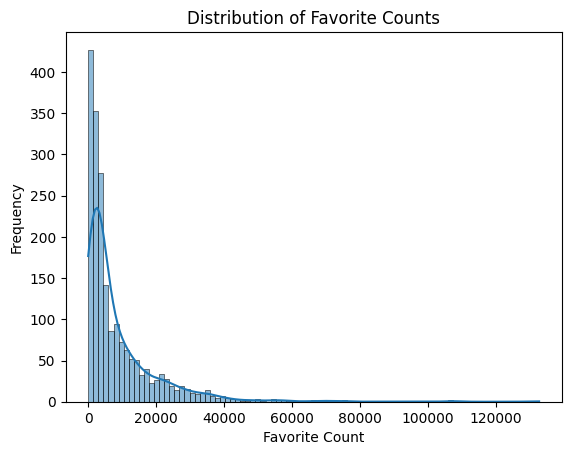

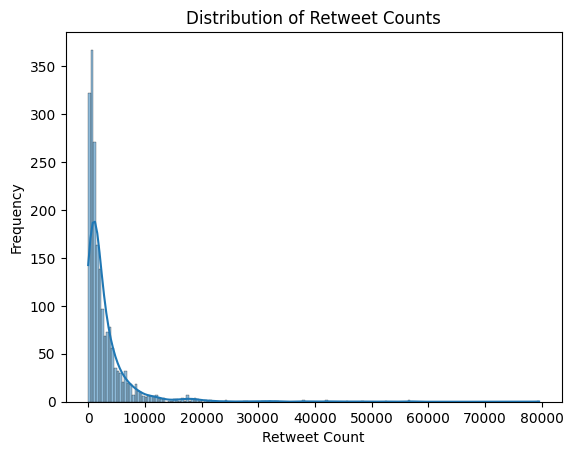

In [327]:
# Histogram of favorite counts
sns.histplot(df_2['favorite_count'], kde=True)
plt.xlabel('Favorite Count')
plt.ylabel('Frequency')
plt.title('Distribution of Favorite Counts')
plt.show()

# Histogram of favorite counts
sns.histplot(df_2['retweet_count'], kde=True)
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('Distribution of Retweet Counts')
plt.show()

- **How do retweet counts and favorite counts vary across tweets?**

  We can look into the tweets and find how they vary, does it depend on a certain factor, or maybe two, or maybe more, We need to look into the distribution of the column and then look into the coorelations between them.

  To see how retweet counts and favorite counts vary across tweets, I can use a scatter plot.

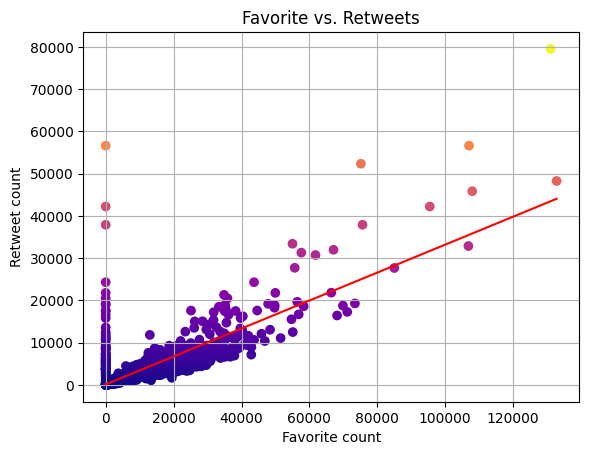

In [328]:
plt.scatter(df_2['favorite_count'], df_2['retweet_count'], c=df_2['retweet_count'], cmap='plasma')
plt.title("Favorite vs. Retweets")
plt.xlabel("Favorite count")
plt.ylabel("Retweet count")
plt.plot(np.unique(df_2['favorite_count']),
         np.poly1d(
             np.polyfit(df_2['favorite_count'], df_2['retweet_count'], 1))(
                 np.unique(df_2['favorite_count'])),
         color='r')
plt.grid()
plt.show()

- **Are there any outliers in the retweet and favorite counts, and what is their impact?**

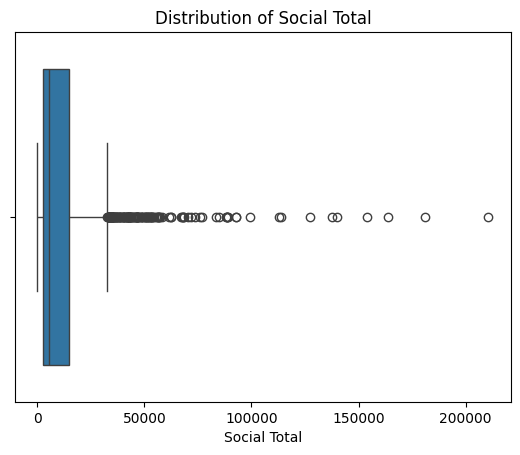

In [329]:
sns.boxplot(x=df_2['social_total'])
plt.xlabel('Social Total')
plt.title('Distribution of Social Total')
plt.show()

In [330]:
# Convert column into datetime
df_2['timestamp'] = pd.to_datetime(df_2['timestamp'])

In [331]:
# Extract Day of week and Hour
df_2['day_of_week'] = df_2['timestamp'].dt.dayofweek
df_2['hour_of_day'] = df_2['timestamp'].dt.hour

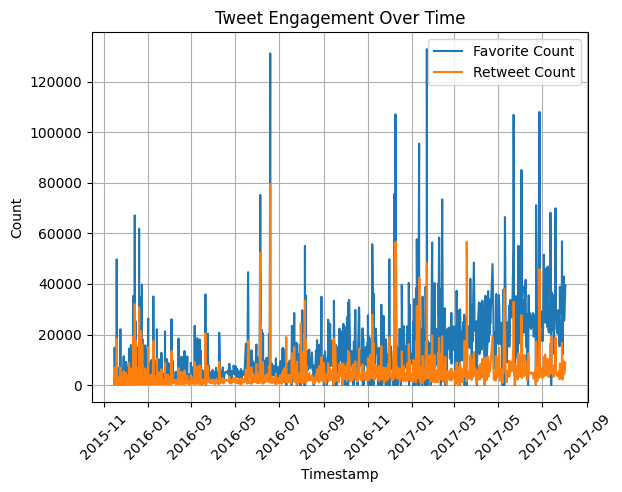

In [362]:
# Visualize the relationship
plt.plot(df_2['timestamp'], df_2['favorite_count'], label='Favorite Count')
plt.plot(df_2['timestamp'], df_2['retweet_count'], label='Retweet Count')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Tweet Engagement Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

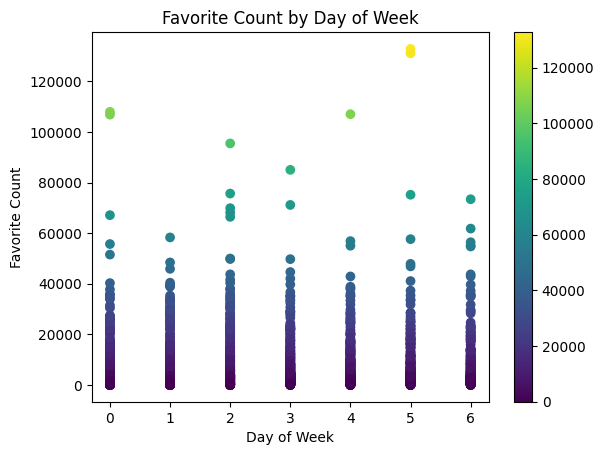

In [333]:
# Scatter plots with color mapping
plt.scatter(df_2['day_of_week'], df_2['favorite_count'], c=df_2['favorite_count'], cmap='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Favorite Count')
plt.title('Favorite Count by Day of Week')
plt.colorbar()
plt.show()

In [334]:
correlation = df_2['day_of_week'].corr(df_2['favorite_count'])
correlation

-0.00494435705996501

- A correlation of `-0.0049...` between the day of the week and favorite count suggests that there's a very weak negative correlation between these two variables. However, the correlation is so close to zero that it's practically negligible.

- This means that the day of the week doesn't have a significant impact on the number of favorites a tweet receives. The number of favorites a tweet gets is likely influenced by other factors more strongly than the day of the week it was posted.

### **What is the distribution of ratings given to the tweets?**

To visualize the distribution of ratings, you can use a histogram.

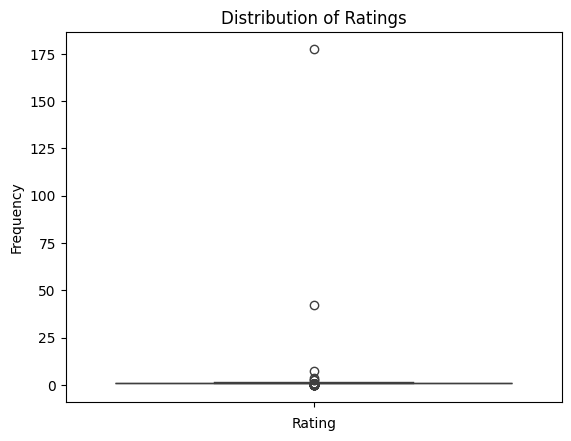

In [335]:
sns.boxplot(df_2['rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

- **Are there any extreme values or outliers in the ratings?**

  Yes, from the boxplot above, We can obviously see the outliers and We remove them to investgate the even further through the analysis.

In [336]:
# Arrange rating and make a boxplot to detect outliers
df_2['rating'].sort_values()

245       0.000000
813       0.000000
1543      0.100000
1746      0.100000
1898      0.100000
           ...    
606       2.700000
410       3.428571
551       7.500000
1729     42.000000
788     177.600000
Name: rating, Length: 1972, dtype: float64

In [337]:
df_2['rating'].value_counts().sort_values()

rating
42.000000       1
0.636364        1
0.818182        1
177.600000      1
1.500000        1
3.428571        1
7.500000        1
2.700000        1
2.600000        1
0.000000        2
0.100000        4
0.200000        8
0.400000       12
0.300000       18
0.600000       30
0.500000       33
1.400000       36
0.700000       45
0.800000       88
0.900000      137
1.300000      279
1.100000      403
1.000000      407
1.200000      461
Name: count, dtype: int64

In [338]:
  # remove outliers [177.6, 42]
  df_2_no_outliers = df_2[(df_2['rating'] < 2) & (df_2['rating'] > 0.7)]

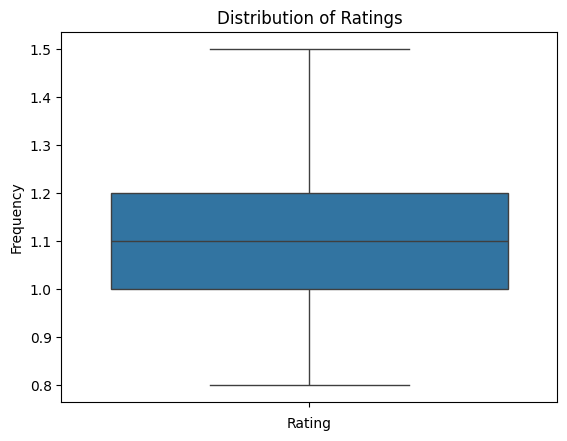

In [339]:
sns.boxplot(df_2_no_outliers['rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [340]:
len(df_2_no_outliers)

1813

- **How do ratings vary across different dog breeds?**

In [341]:
# group the data by dog breed and calculate the average rating for each breed.
ratings_by_breed = df_2.groupby('breed')['rating'].mean().sort_values(ascending=False).head(20)

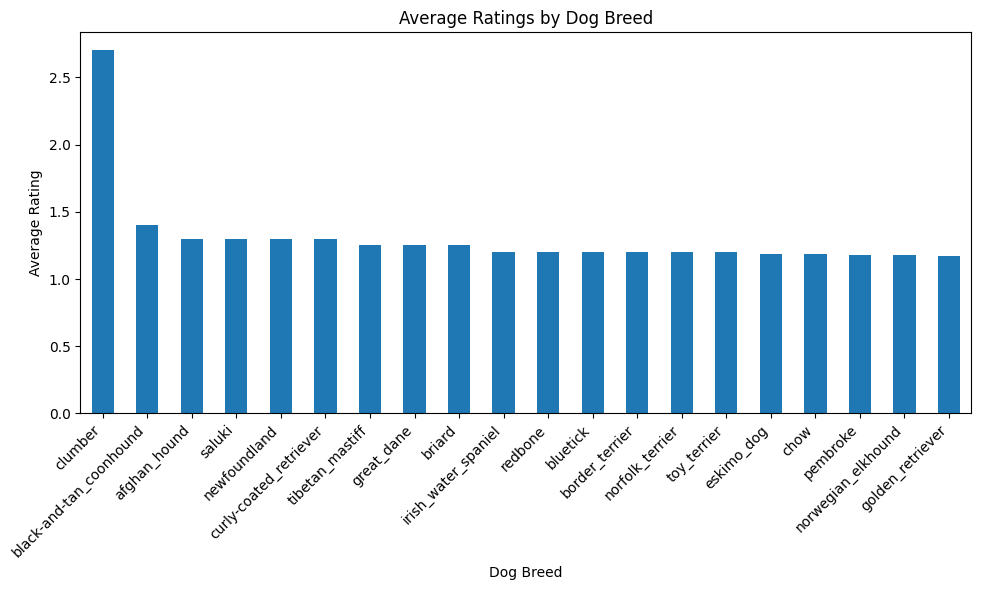

In [342]:
# create a bar plot to visualize the results.
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ratings_by_breed.plot(kind='bar')
plt.xlabel('Dog Breed')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Dog Breed')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

- **How have the ratings changed over time?**

  To analyze how ratings have changed over time, you can plot the average rating for each time period.

In [343]:
# resample the data by month and calculate the average rating for each month.
ratings_over_time = df_2.resample('M', on='timestamp')['rating'].mean()

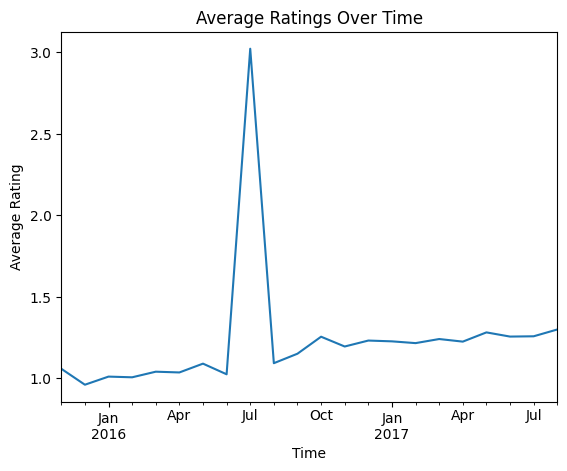

In [344]:
# plot the trend.
ratings_over_time.plot(kind='line')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.title('Average Ratings Over Time')
plt.show()

### **How frequently do different dog stages and breeds appear in the tweets?**

To visualize the frequency of different dog stages and breeds, We can use bar plots.

In [345]:
# Dog Stage
dog_stages = df_2['dog_stage']
dog_stages = dog_stages.str.split(', ')
dog_stages = dog_stages.explode()
dog_stages.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [346]:
# remove null values
dog_stages = dog_stages.dropna()

In [347]:
dog_stages_count = dog_stages.groupby(dog_stages).count()

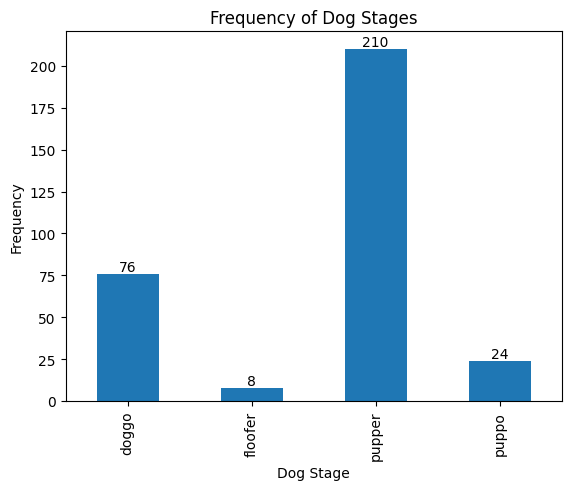

In [348]:
dog_stages_count.plot(kind='bar')
plt.xlabel('Dog Stage')
plt.ylabel('Frequency')
plt.title('Frequency of Dog Stages')

# Add number labels to each bar
for i, v in enumerate(dog_stages_count):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

- **What are the average retweet counts, favorite counts, and total engagement for each dog stage and breed?**

In [349]:
breed_engagement = df_2.groupby('breed').agg({
    'retweet_count': 'mean',
    'favorite_count': 'mean'
})
breed_engagement

,retweet_count,favorite_count
breed,,
afghan_hound,5312.000000,17305.000000
airedale,1154.833333,4089.166667
american_staffordshire_terrier,2326.000000,7803.333333
appenzeller,758.000000,2594.000000
basenji,1270.666667,3162.333333
...,...,...
weimaraner,2788.000000,7380.000000
welsh_springer_spaniel,571.000000,4149.000000
west_highland_white_terrier,2013.200000,8743.000000


In [350]:
# Explode the dog_stage column
df_exploded = df_2.assign(dog_stage=df_2['dog_stage'].str.split(', ')).explode('dog_stage')

# Calculate average engagement metrics
stage_engagement = df_exploded.groupby('dog_stage').agg({
    'retweet_count': 'mean',
    'favorite_count': 'mean'
})

stage_engagement

,retweet_count,favorite_count
dog_stage,,
doggo,7832.013158,17948.026316
floofer,4776.750000,13701.375000
pupper,2590.638095,7082.947619
puppo,6963.291667,21777.083333


- **Which dog stages and breeds are the most popular based on engagement metrics?**

In [351]:
stage_engagement_sorted = stage_engagement.sort_values('favorite_count', ascending=False)
stage_engagement_sorted

,retweet_count,favorite_count
dog_stage,,
puppo,6963.291667,21777.083333
doggo,7832.013158,17948.026316
floofer,4776.750000,13701.375000
pupper,2590.638095,7082.947619


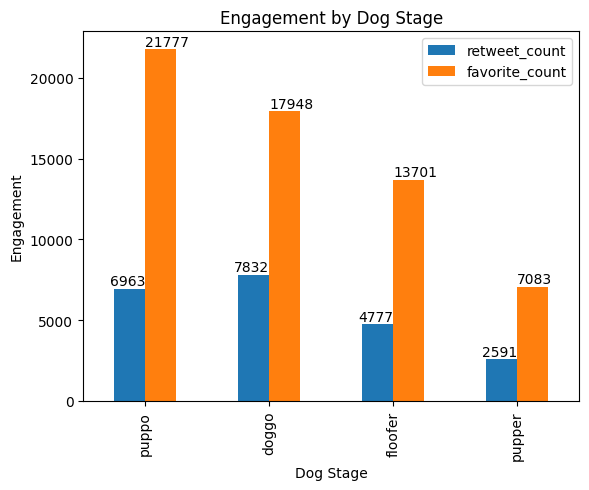

In [352]:
ax = stage_engagement_sorted.plot(kind='bar')
plt.xlabel('Dog Stage')
plt.ylabel('Engagement')
plt.title('Engagement by Dog Stage')

# Add text labels for the two bins
for i, v in enumerate(stage_engagement_sorted['retweet_count']):
    ax.text(i, v, round(v), ha='right', va='bottom')
for i, v in enumerate(stage_engagement_sorted['favorite_count']):
    ax.text(i, v, round(v), ha='left', va='bottom')

plt.show()

In [353]:
# Sort by total engagement in descending order
breed_engagement_sorted = breed_engagement.sort_values('favorite_count', ascending=False)
breed_engagement_sorted

,retweet_count,favorite_count
breed,,
black-and-tan_coonhound,8285.000000,33911.000000
saluki,6508.000000,30932.000000
irish_water_spaniel,6039.000000,25225.000000
newfoundland,4143.000000,24837.000000
french_bulldog,4933.954545,18099.363636
...,...,...
english_springer,343.000000,859.500000
miniature_schnauzer,349.000000,763.000000
dandie_dinmont,45.000000,267.000000


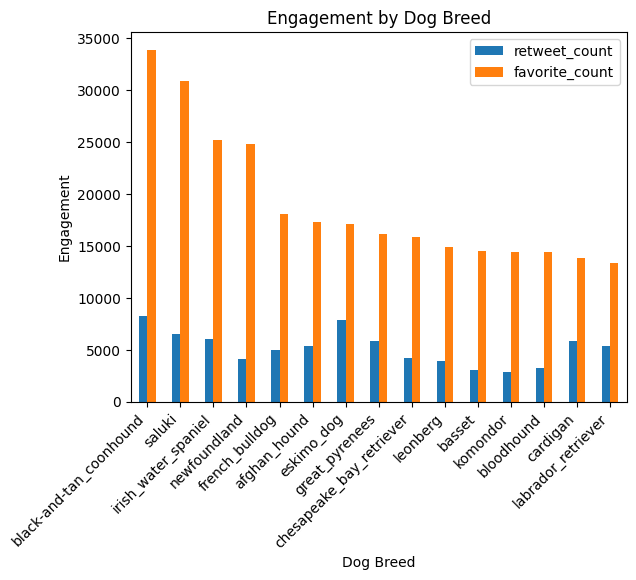

In [354]:
ax = breed_engagement_sorted[:15].plot(kind='bar')
plt.xlabel('Dog Breed')
plt.ylabel('Engagement')
plt.title('Engagement by Dog Breed')
plt.xticks(rotation=45, ha='right')

plt.show()

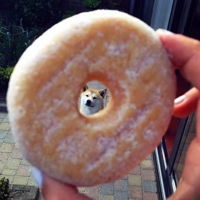

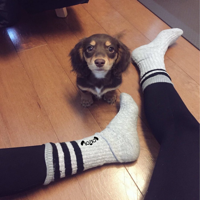

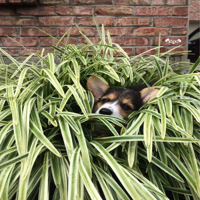

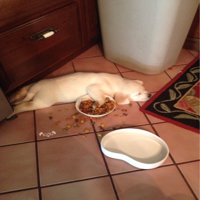

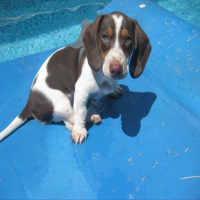

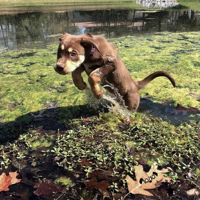

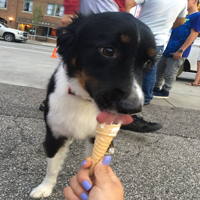

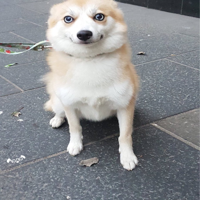

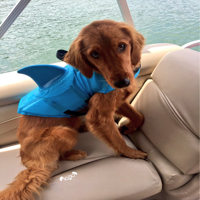

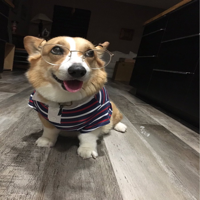

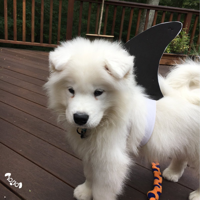

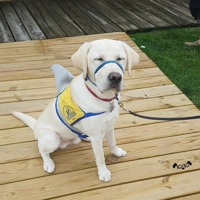

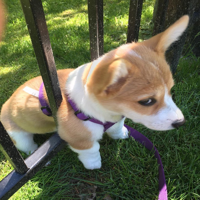

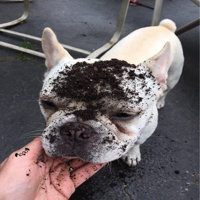

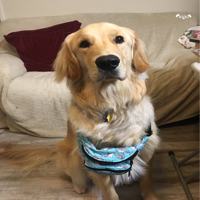

In [355]:
# Iterate over the imgs and display the imgs with PILLOW, make imgs go over each other like a 3x3 grid
for i in df_2['jpg_url'].head(15):
    img = Image.open(requests.get(i, stream=True).raw)
    display(img.resize((200, 200)))
    print("\n")

### **How does tweet engagement change over time?**

To proceed with analyzing how tweet engagement changes over time, we'll break down the steps and code to visualize the trends:

1. Convert the timestamp to a datetime format.
2. Extract year and month from the timestamp.
3. Group by year and month to calculate average engagement metrics.
4. Plot the trends over time.

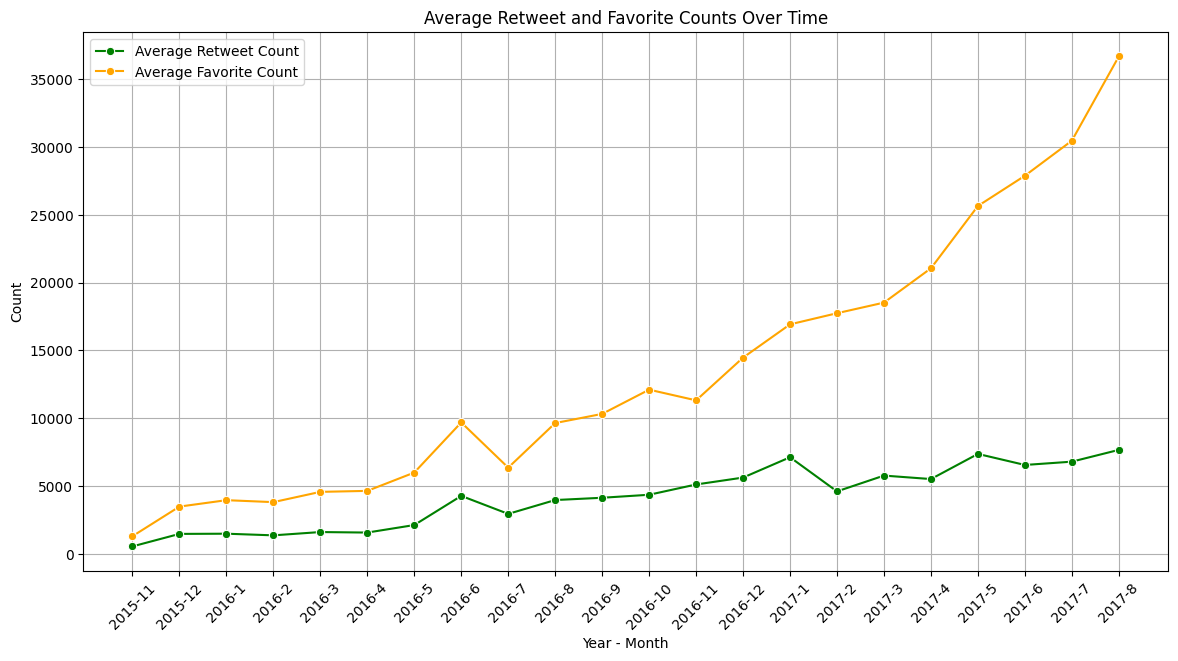

In [360]:
# Convert the timestamp column to datetime format
df_2['timestamp'] = pd.to_datetime(df_2['timestamp'])

# Extract year and month from the timestamp
df_2['year'] = df_2['timestamp'].dt.year
df_2['month'] = df_2['timestamp'].dt.month

# Group by year and month to calculate average retweet and favorite counts per month
monthly_engagement = df_2.groupby(['year', 'month']).agg({
    'retweet_count': 'mean',
    'favorite_count': 'mean',
    'social_total': 'mean'
}).reset_index()

# Creating a new column for year-month combination
monthly_engagement['year_month'] = monthly_engagement['year'].astype(str) + '-' + monthly_engagement['month'].astype(str)

# Plotting the trends over time
plt.figure(figsize=(14, 7))

# Plot for retweet counts
sns.lineplot(x='year_month', y='retweet_count', data=monthly_engagement, label='Average Retweet Count', marker='o', color='green')
sns.lineplot(x='year_month', y='favorite_count', data=monthly_engagement, label='Average Favorite Count', marker='o', color='orange')
plt.title('Average Retweet and Favorite Counts Over Time')
plt.xlabel('Year - Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

### **What are the common themes and sentiments in the tweet content?**

1. Word Frequency Analysis
  - Clean and preprocess the text data (remove stop words, punctuation, etc.).
  - Generate a word cloud or frequency distribution of the most common words.

2. Sentiment Analysis
  - Use a sentiment analysis tool or library (e.g., TextBlob, VADER) to analyze the sentiment of each tweet.
  - Classify the sentiment as positive, negative, or neutral.
  Analyze the distribution of sentiments and their relationship with engagement metrics.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


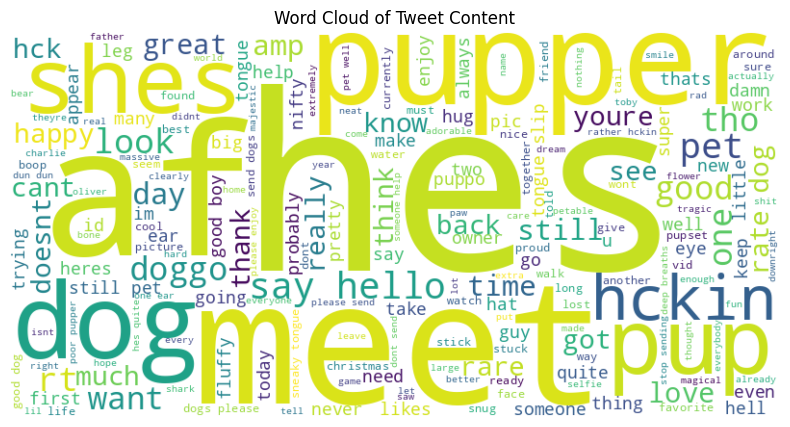

Most common words:
[('hes', 539), ('would', 421), ('af', 282), ('meet', 217), ('pupper', 217), ('dog', 193), ('pet', 165), ('shes', 161), ('pup', 139), ('good', 138), ('dogs', 117), ('say', 111), ('hckin', 110), ('still', 104), ('hello', 100), ('like', 96), ('one', 95), ('tongue', 85), ('rt', 79), ('doesnt', 77)]


In [361]:
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the cleaning function to the text column
df_2['clean_text'] = df_2['text'].apply(clean_text)

# Generate a word cloud
text_combined = ' '.join(df_2['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Content')
plt.show()

# Generate frequency distribution of words
word_counts = Counter(text_combined.split())
common_words = word_counts.most_common(20)
print("Most common words:");
print(common_words)


Sentiment distribution:


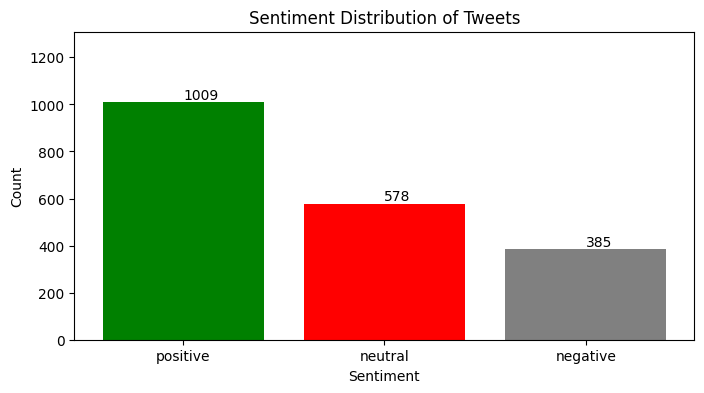

In [358]:
from textblob import TextBlob

# Function to get the sentiment of a tweet
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment function to the clean_text column
df_2['sentiment'] = df_2['clean_text'].apply(get_sentiment)

# Analyze the distribution of sentiments
sentiment_counts = df_2['sentiment'].value_counts()
print("Sentiment distribution:")

# Plot the sentiment distribution with text labels
plt.figure(figsize=(8, 4))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Tweets')
plt.ylim(0, max(sentiment_counts.values) + 300) # Make the plot's height greater than the max value by 100

# Adding text labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.show()